## Dimensionality reduction: synthetic data

### Step 1: read synthetic data and get data matrix

In [1]:
import sys
import numpy as np
import cantera as ct
import matplotlib.pylab as plt

# input file
fname1 = 'x_a5.txt'
fname2 = 'y_a5.txt'

fid1 = open(fname1,'r')
fid2 = open(fname2,'r')

x = np.fromfile(fid1, sep=' ')
y = np.fromfile(fid2, sep=' ')

nx = x.size    # size of data
nv = 2         # number of variables

# data matrix
X = np.zeros((nx,nv))
X[:,0] = x
X[:,1] = y

#### Plot data

Text(0.5, 0, 'Time (ms)')

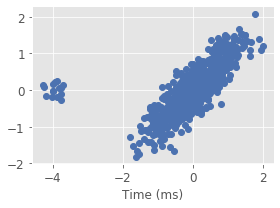

In [2]:
# plot reaction rates
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (4,3)
# Get the best of both ggplot and seaborn
plt.style.use('ggplot')
plt.style.use('seaborn-deep')
plt.rcParams['figure.autolayout'] = True 
plt.figure()
plt.plot(x,y, 'o')
plt.xlabel('Time (ms)')
# plt.ylabel('Reaction rate');

### Step 2: Compute principal values and vectors

#### Scaling data matrix

In [3]:
def scaleData(nf, v):

    # compute mean
    v_mean = np.mean(v, axis=0)
#     print(v_mean)
    v_max = np.max(np.abs(v), axis=0)
#     print(v_max)

    # add for loop to scale the data: NORMALIZATION
    for i in range(nf):
        v[:, i] = (v[:, i] - v_mean[i])/v_max[i]
#         v[:, i] = (v[:, i])/v_max[i]

    return None

Xs = np.zeros((nx,nv)) # scaled data matrix
Xs = np.copy(X)

scaleData(nv,Xs)


#### Co-variance matrix

In [4]:
def covar(u, mom):
    # compute covariance matrix
    for j in range(nv):
        for i in range(nv):
            for n in range(nx):
                mom[i,j] = mom[i,j] + u[n,i] * u[n,j]
                
    mom = mom/nx            
    return None

mom2 = np.zeros((nv, nv), dtype=float, order='F')
covar(Xs,mom2)

#### Co-kurtosis tensor (matricized)

In [5]:
def cokurt(u, tmp):
    # compute covariance matrix
    for l in range(nv):
        for k in range(nv):
            for j in range(nv):
                for i in range(nv):
                    for n in range(nx):
                        tmp[i,j,k,l] = tmp[i,j,k,l] + u[n,i] * u[n,j] * u[n,k] * u[n,l]
    
    tmp=tmp/nx
    return None


mom4_t = np.zeros((nv,nv,nv,nv), dtype=float, order='F')
cokurt(Xs,mom4_t)

In [6]:
mom4 = np.reshape(mom4_t,(nv,nv*nv*nv),order='F')
print(mom4)

[[11.18753517  1.92769824  1.92769824  3.81353948  1.92769824  3.81353948
   3.81353948  8.00177931]
 [ 1.92769824  3.81353948  3.81353948  8.00177931  3.81353948  8.00177931
   8.00177931 19.51946429]]


#### Excess-kurtosis tensor (matricized)

In [ ]:
def cokurt(u, tmp):
    # compute covariance matrix
    for l in range(nv):
        for k in range(nv):
            for j in range(nv):
                for i in range(nv):
                    for n in range(nx):
                        tmp[i,j,k,l] = tmp[i,j,k,l] + u[n,i] * u[n,j] * u[n,k] * u[n,l]
    
    tmp=tmp/nx
    return None


mom4_t = np.zeros((nv,nv,nv,nv), dtype=float, order='F')
cokurt(Xs,mom4_t)

#### Principal values and vectors

In [7]:
# factorize co-variance matrix: SVD of the covariance matrix
U2, S2, V2 = np.linalg.svd(mom2)

# factorize co-kurtosis tensor
U4, S4, V4 = np.linalg.svd(mom4)

In [8]:
# print(U2)
print(U4)
print(S4)
print(V4)

[[-0.47819117 -0.87825578]
 [-0.87825578  0.47819117]]
[27.91195404  9.23740882]
[[-0.25232173 -0.15301943 -0.15301943 -0.31711179 -0.15301943 -0.31711179
  -0.31711179 -0.75127175]
 [-0.96387518  0.01413695  0.01413695  0.05165054  0.01413695  0.05165054
   0.05165054  0.24968328]
 [-0.02234804 -0.14297171  0.98088411 -0.04124942 -0.01911589 -0.04124942
  -0.04124942 -0.10703297]
 [-0.02439571 -0.3091295  -0.03982451  0.91375181 -0.03982451 -0.08624819
  -0.08624819 -0.22550376]
 [-0.02234804 -0.14297171 -0.01911589 -0.04124942  0.98088411 -0.04124942
  -0.04124942 -0.10703297]
 [-0.02439571 -0.3091295  -0.03982451 -0.08624819 -0.03982451  0.91375181
  -0.08624819 -0.22550376]
 [-0.02439571 -0.3091295  -0.03982451 -0.08624819 -0.03982451 -0.08624819
   0.91375181 -0.22550376]
 [ 0.0670377  -0.80549379 -0.09554146 -0.208685   -0.09554146 -0.208685
  -0.208685    0.44472584]]


#### Plot vectors

(-1.0535789772892712,
 0.5547253074659141,
 -0.9837742689747363,
 1.0871017219524712)

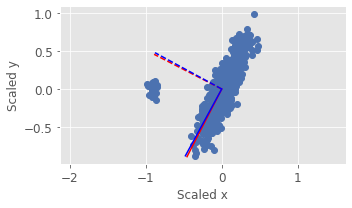

In [9]:
# plot reaction rates
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (5,3)
# Get the best of both ggplot and seaborn
plt.style.use('ggplot')
plt.style.use('seaborn-deep')
plt.rcParams['figure.autolayout'] = True 
plt.figure()
plt.plot(Xs[:,0],Xs[:,1], 'o')
# second moment vectors
plt.plot([0,U2[0,0]],[0,U2[0,1]],'-r')
plt.plot([0,U2[1,0]],[0,U2[1,1]],'--r')
# fourth moment vectors
plt.plot([0,U4[0,0]],[0,U4[0,1]],'-b')
plt.plot([0,U4[1,0]],[0,U4[1,1]],'--b')

plt.xlabel('Scaled x')
plt.ylabel('Scaled y')
plt.axis('equal')

### Step 2: Compute principal values and vectors